# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {
        "q": city,
        "apiKey": weather_api_key,
        "units": "imperial"
    }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(city_weather['dt']))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rukban
City not found. Skipping...
Processing Record 2 of Set 1 | turpan
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | berekum
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | ishigaki
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | marsabit
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | candido mendes
Processing Record 17 of Set 1 | shingu
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | pokhara
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | nova sint

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            561
Lat             561
Lng             561
Max Temp (F)    561
Humidity        561
Cloudiness      561
Wind Speed      561
Country         561
Date            561
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,turpan,42.9333,89.1667,27.01,57,12,1.68,CN,2024-01-04 21:45:34
1,waitangi,-43.9535,-176.5597,62.82,88,100,26.64,NZ,2024-01-04 21:45:35
2,berekum,7.4534,-2.5840,82.47,50,99,6.11,GH,2024-01-04 21:45:36
3,iqaluit,63.7506,-68.5145,2.93,60,75,3.44,CA,2024-01-04 21:45:36
4,yellowknife,62.4560,-114.3525,-28.62,83,75,5.75,CA,2024-01-04 21:45:36


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,turpan,42.9333,89.1667,27.01,57,12,1.68,CN,2024-01-04 21:45:34
1,waitangi,-43.9535,-176.5597,62.82,88,100,26.64,NZ,2024-01-04 21:45:35
2,berekum,7.4534,-2.5840,82.47,50,99,6.11,GH,2024-01-04 21:45:36
3,iqaluit,63.7506,-68.5145,2.93,60,75,3.44,CA,2024-01-04 21:45:36
4,yellowknife,62.4560,-114.3525,-28.62,83,75,5.75,CA,2024-01-04 21:45:36


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

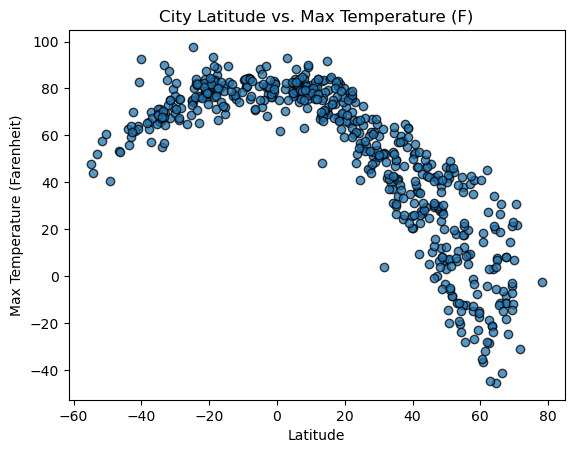

In [43]:
# Build scatter plot for latitude vs. temperature
latitude = [city['Lat'] for city in city_data]
temperature = [city['Max Temp (F)'] for city in city_data]

plt.scatter(latitude, temperature, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

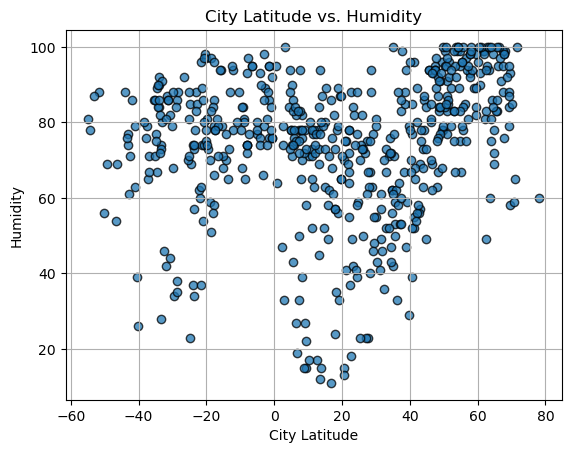

In [46]:
# Build the scatter plots for latitude vs. humidity
humidity = [city['Humidity'] for city in city_data]

plt.scatter(latitude, humidity, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

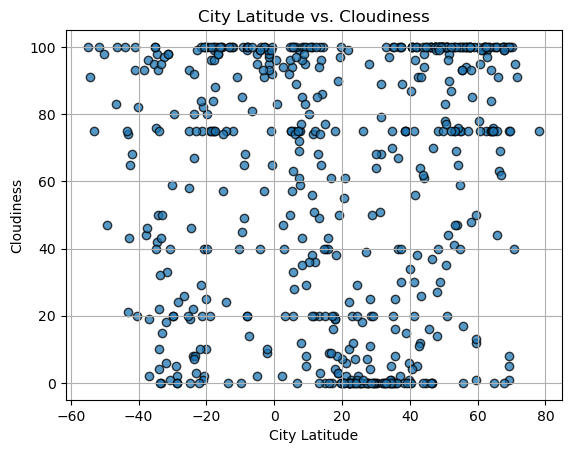

In [48]:
# Build the scatter plots for latitude vs. cloudiness
clouds = [city['Cloudiness'] for city in city_data]

plt.scatter(latitude, clouds, edgecolors='black', alpha=0.75)


# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

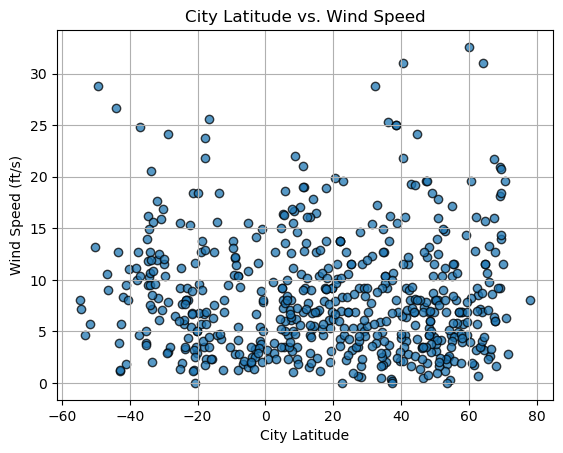

In [49]:
# Build the scatter plots for latitude vs. wind speed
wind = [city['Wind Speed'] for city in city_data]

plt.scatter(latitude, wind, edgecolors='black', alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (ft/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def lin_regress_plots(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = [x * slope + intercept for x in x_values]
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show
    print(f"r-value is {rvalue}")


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = [city for city in city_data if city['Lat'] >= 0]

northern_hemi_df = pd.DataFrame(northern_hemi_df)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,turpan,42.9333,89.1667,27.01,57,12,1.68,CN,2024-01-04 21:45:34
1,berekum,7.4534,-2.5840,82.47,50,99,6.11,GH,2024-01-04 21:45:36
2,iqaluit,63.7506,-68.5145,2.93,60,75,3.44,CA,2024-01-04 21:45:36
3,yellowknife,62.4560,-114.3525,-28.62,83,75,5.75,CA,2024-01-04 21:45:36
4,colonia,50.9333,6.9500,45.25,83,20,8.05,DE,2024-01-04 21:45:37


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = [city for city in city_data if city['Lat'] <= 0]

southern_hemi_df = pd.DataFrame(southern_hemi_df)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,62.82,88,100,26.64,NZ,2024-01-04 21:45:35
1,port mathurin,-19.6833,63.4167,82.26,81,80,9.60,MU,2024-01-04 21:45:37
2,edinburgh of the seven seas,-37.0676,-12.3116,57.20,71,19,24.85,SH,2024-01-04 21:45:38
3,grytviken,-54.2811,-36.5092,44.06,78,91,7.14,GS,2024-01-04 21:45:38
4,port-aux-francais,-49.3500,70.2167,40.60,69,47,28.79,TF,2024-01-04 21:45:39


###  Temperature vs. Latitude Linear Regression Plot

r-value is -0.8800248367418523


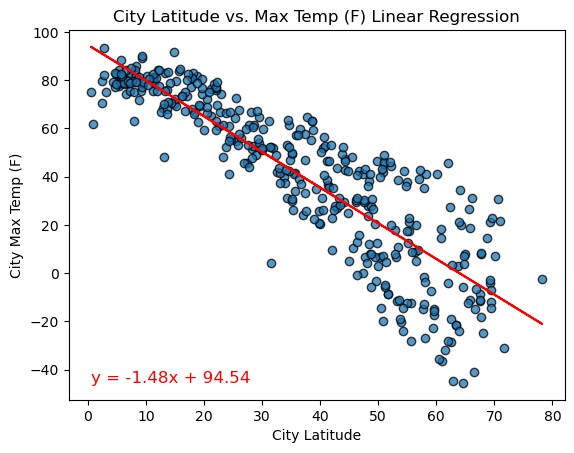

In [103]:
# Linear regression on Northern Hemisphere
lin_regress_plots((northern_hemi_df['Lat']), (northern_hemi_df['Max Temp (F)']), "City Latitude", "City Max Temp (F)", "City Latitude vs. Max Temp (F) Linear Regression")

r-value is 0.6621728160576258


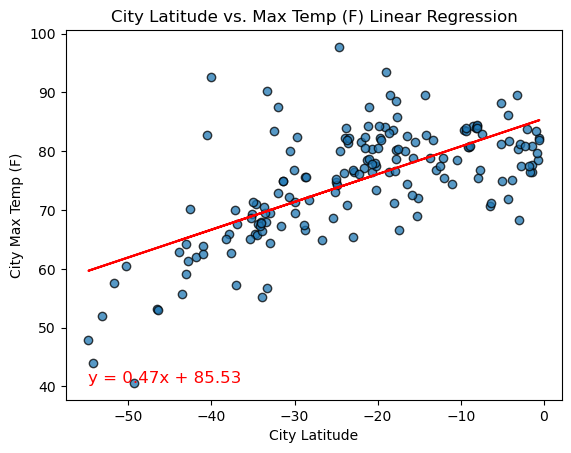

In [104]:
# Linear regression on Southern Hemisphere
lin_regress_plots((southern_hemi_df['Lat']), (southern_hemi_df['Max Temp (F)']), "City Latitude", "City Max Temp (F)", "City Latitude vs. Max Temp (F) Linear Regression")

**Discussion about the linear relationship:** 
The linear relationship is showing in the northern hemisphere that the higher the latitude, the colder the max temperature is. The linear relationship for the southern hemisphere is showing that the higher the latitude the warmer the max temperature is. 

### Humidity vs. Latitude Linear Regression Plot

r-value is 0.4464650663819277


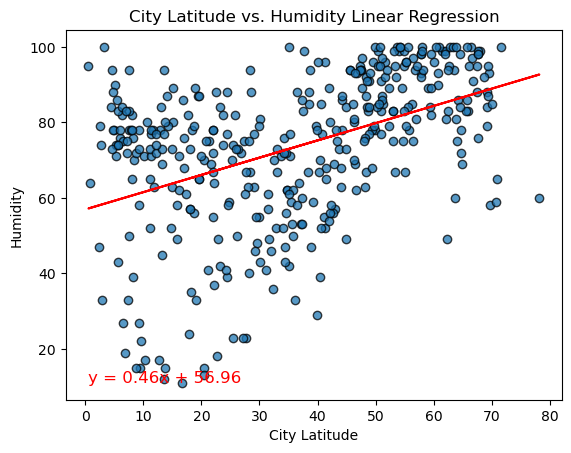

In [105]:
# Northern Hemisphere
lin_regress_plots((northern_hemi_df['Lat']), (northern_hemi_df['Humidity']), "City Latitude", "Humidity", "City Latitude vs. Humidity Linear Regression")

r-value is 0.23324666680095116


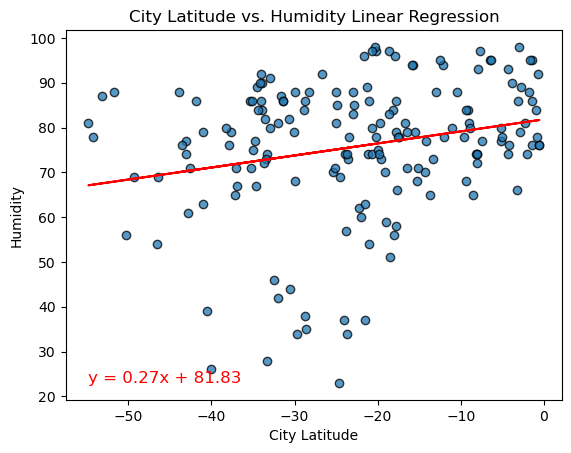

In [106]:
# Southern Hemisphere
lin_regress_plots((southern_hemi_df['Lat']), (southern_hemi_df['Humidity']), "City Latitude", "Humidity", "City Latitude vs. Humidity Linear Regression")

**Discussion about the linear relationship:** 
The linear relationship is showing in the northern hemisphere that the higher the latitude, the humidity is higher. The linear relationship in the southern hemisphere is also showing that there is also a higher humidity at higher latitudes, although compared to the norther hemispehere humidity changes at a different rate as indicated by the differing slopes. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value is 0.2761935950912433


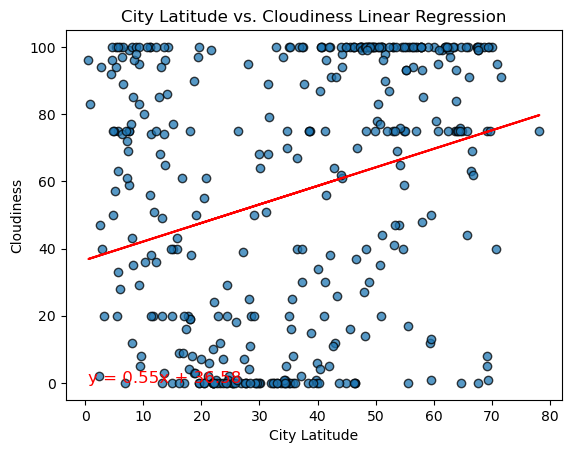

In [107]:
# Northern Hemisphere
lin_regress_plots((northern_hemi_df['Lat']), (northern_hemi_df['Cloudiness']), "City Latitude", "Cloudiness", "City Latitude vs. Cloudiness Linear Regression")

r-value is 0.15733100757217716


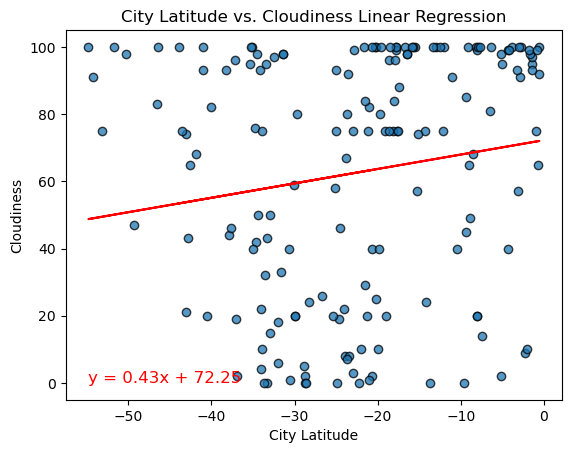

In [108]:
# Southern Hemisphere
lin_regress_plots((southern_hemi_df['Lat']), (southern_hemi_df['Cloudiness']), "City Latitude", "Cloudiness", "City Latitude vs. Cloudiness Linear Regression")

**Discussion about the linear relationship:**
The linear relationship is showing in the northern hemisphere that the higher the latitude, the cloudiness is higher. The linear relationship in the southern hemisphere is also showing that there is also a higher cloudiness at higher latitudes, although compared to the norther hemispehere humidity changes at a different rate as indicated by the differing slopes. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value is 0.016979446524808314


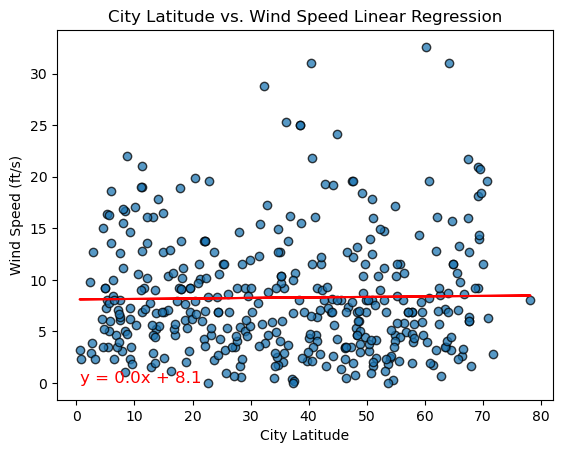

In [109]:
# Northern Hemisphere
lin_regress_plots((northern_hemi_df['Lat']), (northern_hemi_df['Wind Speed']), "City Latitude", "Wind Speed (ft/s)", "City Latitude vs. Wind Speed Linear Regression")

r-value is -0.23060249408744923


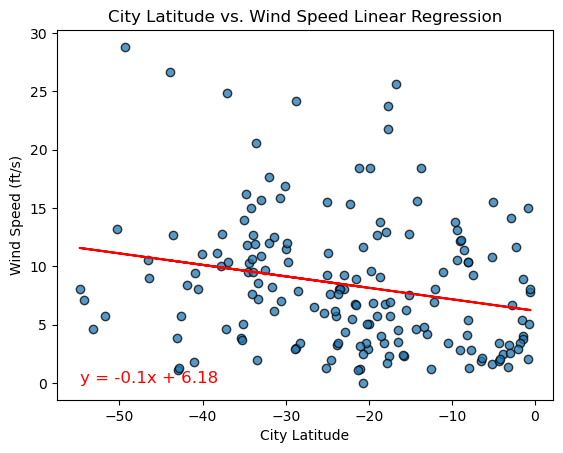

In [110]:
# Southern Hemisphere
lin_regress_plots((southern_hemi_df['Lat']), (southern_hemi_df['Wind Speed']), "City Latitude", "Wind Speed (ft/s)", "City Latitude vs. Wind Speed Linear Regression")

**Discussion about the linear relationship:** 
The linear relationship is showing in the northern hemisphere, interestingly, that there is neither an increase nor decrease in windspeed when getting to higher latitudes as noted by the slope of 0.0. The linear relationship in the southern hemisphere is  showing that wind speed increases at lower latitudes as indicated by the slope of -0.1. 